In [ ]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter.filedialog import *
from google.colab.patches import cv2_imshow

In [ ]:
# Upload the image to your Google Drive and provide the path to read it.
# Replace '/content/drive/MyDrive/810_4776.jpg' with the correct path to your image file in Drive.

img = cv2.imread('/content/drive/MyDrive/810_4776.jpg')

Text(0.5, 1.0, 'original+GB+MB+Bilateral Filter')

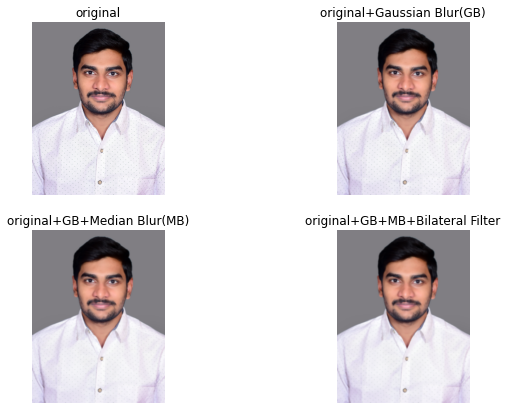

In [ ]:
# Apply some Gaussian blur on the image
img_gb = cv2.GaussianBlur(img, (7, 7), 0)
    # Apply some Median blur on the image
img_mb = cv2.medianBlur(img_gb, 5)
    # Apply a bilateral filer on the image
img_bf = cv2.bilateralFilter(img_mb, 5, 80, 80)
#resize_img2 = cv2.resize(originalmage, (1000, 1000))

fig = plt.figure(figsize=(10, 7))

rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original")

fig.add_subplot(rows, columns, 2)
plt.imshow(cv2.cvtColor(img_gb, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original+Gaussian Blur(GB)")

fig.add_subplot(rows, columns, 3)
plt.imshow(cv2.cvtColor(img_mb, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original+GB+Median Blur(MB)")

fig.add_subplot(rows, columns, 4)
plt.imshow(cv2.cvtColor(img_bf, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original+GB+MB+Bilateral Filter")

Text(0.5, 1.0, 'original+GB+MB+Bilateral Filter')

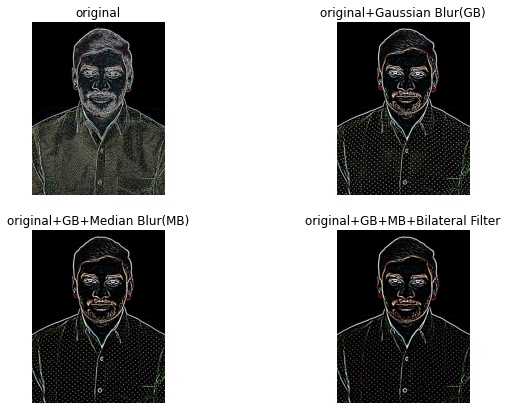

In [ ]:
# Use the laplace filter to detect edges
img_lp_im = cv2.Laplacian(img, cv2.CV_8U, ksize=5)
img_lp_gb = cv2.Laplacian(img_gb, cv2.CV_8U, ksize=5)
img_lp_mb = cv2.Laplacian(img_mb, cv2.CV_8U, ksize=5)
img_lp_al = cv2.Laplacian(img_bf, cv2.CV_8U, ksize=5)
    #resize_img3 = cv2.resize(originalmage, (1000, 1000))
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(rows, columns, 1)
plt.imshow(cv2.cvtColor(img_lp_im, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original")

fig.add_subplot(rows, columns, 2)
plt.imshow(cv2.cvtColor(img_lp_gb, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original+Gaussian Blur(GB)")

fig.add_subplot(rows, columns, 3)
plt.imshow(cv2.cvtColor(img_lp_mb, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original+GB+Median Blur(MB)")

fig.add_subplot(rows, columns, 4)
plt.imshow(cv2.cvtColor(img_lp_al, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original+GB+MB+Bilateral Filter")

Text(0.5, 1.0, 'original+GB+MB+Bilateral Filter')

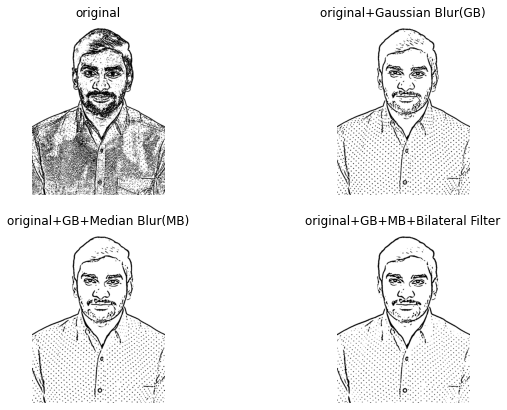

In [ ]:
    # Convert the image to greyscale (1D)
img_lp_im_grey = cv2.cvtColor(img_lp_im, cv2.COLOR_BGR2GRAY)
img_lp_gb_grey = cv2.cvtColor(img_lp_gb, cv2.COLOR_BGR2GRAY)
img_lp_mb_grey = cv2.cvtColor(img_lp_mb, cv2.COLOR_BGR2GRAY)
img_lp_al_grey = cv2.cvtColor(img_lp_al, cv2.COLOR_BGR2GRAY)
    #resize_img4 = cv2.resize(originalmage, (1000, 1000))
    # Manual image thresholding
_, EdgeImage = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    #resize_img5 = cv2.resize(originalmage, (1000, 1000))
    # Remove some additional noise
blur_im = cv2.GaussianBlur(img_lp_im_grey, (5, 5), 0)
blur_gb = cv2.GaussianBlur(img_lp_gb_grey, (5, 5), 0)
blur_mb = cv2.GaussianBlur(img_lp_mb_grey, (5, 5), 0)
blur_al = cv2.GaussianBlur(img_lp_al_grey, (5, 5), 0)
    # Apply a threshold (Otsu)
_, tresh_im = cv2.threshold(blur_im, 245, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, tresh_gb = cv2.threshold(blur_gb, 245, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, tresh_mb = cv2.threshold(blur_mb, 245, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, tresh_al = cv2.threshold(blur_al, 245, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the black and the white
inverted_original = cv2.subtract(255, tresh_im)
inverted_GaussianBlur = cv2.subtract(255, tresh_gb)
inverted_MedianBlur = cv2.subtract(255, tresh_mb)
inverted_Bilateral = cv2.subtract(255, tresh_al)

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(rows, columns, 1)
plt.imshow(cv2.cvtColor(inverted_original, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original")

fig.add_subplot(rows, columns, 2)
plt.imshow(cv2.cvtColor(inverted_GaussianBlur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original+Gaussian Blur(GB)")

fig.add_subplot(rows, columns, 3)
plt.imshow(cv2.cvtColor(inverted_MedianBlur, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original+GB+Median Blur(MB)")

fig.add_subplot(rows, columns, 4)
plt.imshow(cv2.cvtColor(inverted_Bilateral, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("original+GB+MB+Bilateral Filter")


Text(0.5, 1.0, 'Bin')

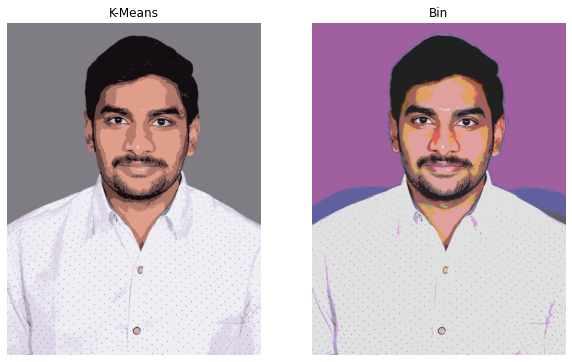

In [ ]:

    # Reshape the image
img_reshaped = img.reshape((-1, 3))
    # convert to np.float32
img_reshaped = np.float32(img_reshaped)
    # Set the Kmeans criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # Set the amount of K (colors)
K = 8
    # Apply Kmeans
_, label, center = cv2.kmeans(img_reshaped, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Covert it back to np.int8
center = np.uint8(center)
res = center[label.flatten()]
    # Reshape it back to an image
img_Kmeans = res.reshape((img.shape))
    # Reduce the colors of the original image
div = 64
img_bins = img // div * div + div // 2

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_Kmeans, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("K-Means")

fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_bins, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Bin")



True

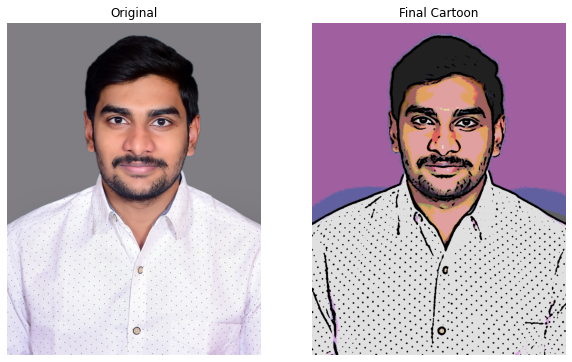

In [ ]:
    # Convert the mask image back to color
inverted_Bilateral = cv2.cvtColor(inverted_Bilateral, cv2.COLOR_GRAY2RGB)
    # Combine the edge image and the binned image
cartoon = cv2.bitwise_and(inverted_Bilateral, img_bins)

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Original")

fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Final Cartoon")

    #save
cv2.imwrite("/content/drive/MyDrive/Pics & Videos/cartoon.jpeg",1)